In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [28]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [29]:
# Save the input and target variables

data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

In [30]:
# Normalise the target data (this will make clearer training curves)

targets = (targets - targets.mean(axis=0)) / targets.std()
print(targets)

[-1.47194752e-02 -1.00165882e+00 -1.44579915e-01  6.99512942e-01
 -2.22496178e-01 -7.15965848e-01 -1.83538046e-01 -1.15749134e+00
 -5.47147277e-01  2.05006151e+00 -6.64021672e-01 -1.07957508e+00
  3.48889755e-01  4.26806019e-01 -4.43258925e-01  2.45001404e-01
  1.80071184e-01 -1.05621783e-01 -7.15965848e-01  2.06043272e-01
 -1.09256112e+00 -1.33929596e+00 -1.09256112e+00  1.20596866e+00
  4.13819975e-01  6.47568766e-01 -1.96524090e-01 -8.71798376e-01
 -2.74440354e-01  1.69943833e+00 -3.00412442e-01 -1.20943552e+00
  2.45262887e+00 -8.45826288e-01 -1.13151925e+00 -6.51035629e-01
  1.46568953e+00  1.60853602e+00  1.29687096e+00 -8.06868156e-01
 -6.77007716e-01 -1.26137969e+00 -1.18346343e+00 -7.80896068e-01
  1.38777327e+00 -1.28735178e+00  4.91736239e-01 -1.31593871e-01
 -1.00165882e+00 -1.31593871e-01  3.72247006e-02  9.46247777e-01
 -1.20943552e+00 -6.25063541e-01  3.87847887e-01 -3.13398486e-01
 -1.30033783e+00 -1.49512849e+00  2.32015360e-01  2.32015360e-01
 -1.18346343e+00 -1.05621

In [31]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

#### Train a feedforward neural network model

In [34]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    return Sequential([
        Dense(128, activation="relu", input_shape=(train_data.shape[1], )),
        Dense(128, activation="relu", ),
        Dense(128, activation="relu", ),
        Dense(128, activation="relu", ),
        Dense(128, activation="relu", ),
        Dense(128, activation="relu", ),
        Dense(1),
    ])


model = get_model()


In [18]:
# Print the model summary

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [11]:
# Compile the model

model.compile(optimizer="adam", loss="mse", metrics=["mae", ])

In [12]:
# Train the model, with some of the data reserved for validation

history = model.fit(
    train_data,
    train_targets,
    epochs=100,
    validation_split=0.15,
    batch_size=64,
    # verbose=False,
)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 [==============================] - 1s 4ms/sample - loss: 0.9843 - mae: 0.8500 - val_loss: 1.0045 - val_mae: 0.8715
Epoch 2/100
337/337 [==============================] - 0s 541us/sample - loss: 0.8862 - mae: 0.8083 - val_loss: 0.8080 - val_mae: 0.7910
Epoch 3/100
337/337 [==============================] - 0s 586us/sample - loss: 0.6828 - mae: 0.7071 - val_loss: 0.5191 - val_mae: 0.6267
Epoch 4/100
337/337 [==============================] - 0s 592us/sample - loss: 0.5173 - mae: 0.5877 - val_loss: 0.4871 - val_mae: 0.5270
Epoch 5/100
337/337 [==============================] - 0s 574us/sample - loss: 0.4966 - mae: 0.5560 - val_loss: 0.4302 - val_mae: 0.5408
Epoch 6/100
337/337 [==============================] - 0s 335us/sample - loss: 0.4786 - mae: 0.5568 - val_loss: 0.4543 - val_mae: 0.5528
Epoch 7/100
337/337 [==============================] - 0s 603us/sample - loss: 0.4721 - mae: 0.5495 - val_loss: 0.4791 - val_mae: 0.593

In [14]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 1.0736 - mae: 0.7395


[0.9586547162797716, 0.7395352]

#### Plot the learning curves

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

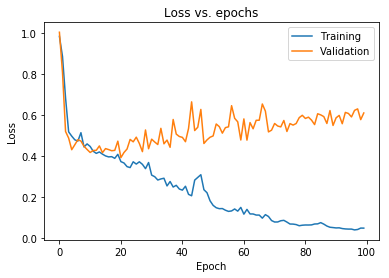

In [16]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validat ion'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras import regularizers

In [47]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd), input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd),),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd),),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd),),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd),),
        Dropout(rate),
        Dense(128, activation="relu", kernel_regularizer=regularizers.l2(wd),),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [14]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(1e-5, 0.3)


In [15]:
# Compile the model

model.compile(optimizers="adam", loss="mse", metrics=["mae"])

In [17]:
# Train the model, with some of the data reserved for validation

history = model.fit(
    train_data,
    train_targets,
    epochs=100,
    validation_split=0.15,
    batch_size=64,
)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 [==============================] - 0s 261us/sample - loss: 0.3822 - mae: 0.4916 - val_loss: 0.5708 - val_mae: 0.5833
Epoch 2/100
337/337 [==============================] - 0s 298us/sample - loss: 0.3846 - mae: 0.4941 - val_loss: 0.5107 - val_mae: 0.5437
Epoch 3/100
337/337 [==============================] - 0s 534us/sample - loss: 0.3889 - mae: 0.4914 - val_loss: 0.4912 - val_mae: 0.5407
Epoch 4/100
337/337 [==============================] - 0s 323us/sample - loss: 0.3877 - mae: 0.4860 - val_loss: 0.5175 - val_mae: 0.5654
Epoch 5/100
337/337 [==============================] - 0s 296us/sample - loss: 0.3912 - mae: 0.4944 - val_loss: 0.5720 - val_mae: 0.5827
Epoch 6/100
337/337 [==============================] - 0s 311us/sample - loss: 0.3829 - mae: 0.4827 - val_loss: 0.5587 - val_mae: 0.5964
Epoch 7/100
337/337 [==============================] - 0s 307us/sample - loss: 0.3948 - mae: 0.4900 - val_loss: 0.5495 - val_mae: 0.5

In [19]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.3798 - mae: 0.5600


[0.5405561327934265, 0.5599834]

#### Plot the learning curves

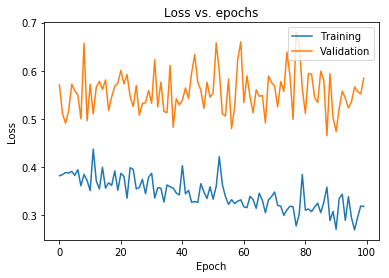

In [21]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [35]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback


class TrainingCallback(Callback):
    
    def on_train_begin(self, logs=None):
        print("Starting Training....")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training Starting batch {batch}")
        
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training Finished batch {batch}")
        
    def on_epoch_end(self, epoch, logs=None):
        print(f"Finished epoch {epoch}")
        
    def on_train_end(self, logs=None):
        print("Finished Training....")

        
class TestingCallback(Callback):
    
    def on_test_begin(self, logs=None):
        print("Starting testing....")
        
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing Starting batch {batch}")
        
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing Finished batch {batch}")
        
    def on_test_end(self, logs=None):
        print("Finished Testing....")
        
class PredictionCallback(Callback):
    
    def on_predict_begin(self, logs=None):
        print("Starting prediction....")
        
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction Starting batch {batch}")
        
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Prediction Finished batch {batch}")
        
    def on_predict_end(self, logs=None):
        print("Finished prediction....")


In [11]:
# Re-build the model

model = get_regularised_model(1e-5, 0.3)


In [14]:
# Compile the model

model.compile(optimizers="adam", loss="mse", metrics=["mse"])

#### Train the model with the callback

In [19]:
# Train the model, with some of the data reserved for validation

model.fit(
    train_data,
    train_targets,
    epochs=3,
    batch_size=128,
    verbose=False,
    callbacks=[TrainingCallback(), ]
)

Starting Training....
Starting epoch 0
Training Starting batch 0
Training Finished batch 0
Training Starting batch 1
Training Finished batch 1
Training Starting batch 2
Training Finished batch 2
Training Starting batch 3
Training Finished batch 3
Finished epoch 0
Starting epoch 1
Training Starting batch 0
Training Finished batch 0
Training Starting batch 1
Training Finished batch 1
Training Starting batch 2
Training Finished batch 2
Training Starting batch 3
Training Finished batch 3
Finished epoch 1
Starting epoch 2
Training Starting batch 0
Training Finished batch 0
Training Starting batch 1
Training Finished batch 1
Training Starting batch 2
Training Finished batch 2
Training Starting batch 3
Training Finished batch 3
Finished epoch 2
Finished Training....


In [24]:
# Evaluate the model

model.evaluate(
    test_data,
    test_targets,
    verbose=False,
    callbacks=[TestingCallback(), ]
)

Starting testing....
Testing Starting batch 0
Testing Finished batch 0
Testing Starting batch 1
Testing Finished batch 1
Finished Testing....


[0.5587131751908196, 0.55213904]

In [27]:
# Make predictions with the model

model.predict(
    test_data,
    verbose=False,
    callbacks=[PredictionCallback(), ]
)

Starting prediction....
Prediction Starting batch 0
Prediction Finished batch 0
Prediction Starting batch 1
Prediction Finished batch 1
Finished prediction....


array([[ 0.90195006],
       [-0.7805037 ],
       [ 1.1069028 ],
       [-0.6572174 ],
       [ 0.69839203],
       [-0.83751243],
       [-0.72736734],
       [ 0.6161137 ],
       [ 0.09845769],
       [ 0.23246922],
       [-0.41916573],
       [ 0.9593134 ],
       [ 0.5897119 ],
       [-0.8240912 ],
       [ 0.5324591 ],
       [ 1.0767124 ],
       [-0.9435827 ],
       [ 0.63784665],
       [-0.9523191 ],
       [ 0.5960402 ],
       [-0.4973492 ],
       [-0.81486857],
       [-0.5949389 ],
       [-0.6397766 ],
       [ 0.7116452 ],
       [-0.5245146 ],
       [ 0.88497907],
       [-0.79235864],
       [ 0.6375318 ],
       [-0.62757087],
       [-0.09104794],
       [ 0.5658635 ],
       [-0.6564881 ],
       [-0.65992194],
       [ 0.7080824 ],
       [-0.29836646],
       [-0.78468   ],
       [-0.69467205],
       [-0.6079099 ],
       [ 0.82209957],
       [-0.8413172 ],
       [-0.4101213 ],
       [-0.48453113],
       [-0.74157757],
       [-0.6005848 ]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [60]:
# Re-train the unregularised model
import tensorflow

unregularised_model = get_model()
unregularised_model.compile(
    optimizers="adam",
    loss="mse",
)
unregularised_history = unregularised_model.fit(
    train_data,
    train_targets,
    epochs=100,
    validation_split=0.15,
    batch_size=64,
    verbose=False,
    callbacks=[
        tensorflow.keras.callbacks.EarlyStopping(
            patience=2
        )
    ]
)

In [61]:
# Evaluate the model on the test set

unregularised_model.evaluate(
    test_data,
    test_targets,
    verbose=2
)

45/1 - 0s - loss: 0.5740


0.6633325331740909

In [62]:
# Re-train the regularised model

# Re-train the unregularised model
import tensorflow

regularised_model = get_regularised_model(
    1e-8, 0.2
)
regularised_model.compile(
    optimizers="adam",
    loss="mse",
)
regularised_history = regularised_model.fit(
    train_data,
    train_targets,
    epochs=100,
    validation_split=0.15,
    batch_size=64,
    verbose=False,
    callbacks=[
        tensorflow.keras.callbacks.EarlyStopping(
            patience=2
        )
    ]
)

In [63]:
# Evaluate the model on the test set

regularised_model.evaluate(
    test_data,
    test_targets,
    verbose=2
)

45/1 - 0s - loss: 0.3094


0.3638882193300459

#### Plot the learning curves

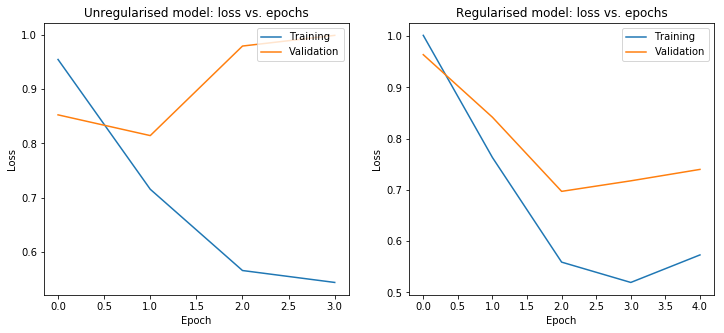

In [64]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unregularised_history.history['loss'])
plt.plot(unregularised_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(regularised_history.history['loss'])
plt.plot(regularised_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()